# <center>Analysis Challenge Assignment 3</center>
### <center>Opportunity Project Problem Statement</center>
<center>Author: Simon Chen, Jianan Dingqian</center>
<center>Time: Nov 7, 2021</center>

#### **1. Criteria**


**U.S. Department of Education**

Policy Priority: The Department of Education is focused on ensuring that parents, students, and policymakers are able to use its publicly available data to take meaningful action to improve outcomes.

**Supporting Decision-Making for Student Sub-populations and their Families**

Problem: Certain mobile or disconnected student populations entering or reentering the community could greatly benefit from data and resources to support their wellbeing and success. Such students and families often lack information that is necessary to distinguish between their school options, access services, and identify affordable housing near high-quality school and in safe neighborhoods that have access to transit and employment.

**Identifying Equity Scores and Gaps**

Problem: Within and across school districts and communities there are significant disparities in outcomes (e.g. achievement, graduation rate) between different student groups, in whole or in part due to inequitable access to resources (e.g. per-pupil expenditures, rigorous coursework, effective teachers). Decision-makers and parents to would benefit from information that could help them understand these inequities and/or identify where gaps between groups of students may exist.

#### **2. Tasks**


Analyze the data to identify clusters of similar colleges and universities.
1. Decide variables to use and proprocess it
2. Use dimension reduction/feature extraction methods to preprocess data for K-means.
3. Use clustering Algorithm K-means
4. Explain the clusters.

#### **3. Import**

###### a. College Scorecard data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading College Scorecard data in pandas df.
college_data = pd.read_csv('https://raw.githubusercontent.com/lmaosimon/ColumbiaCourseProjects/main/HUDK%204050/Analysis_Challenge_Assignment%203/aca3_dataset/CollegeScorecard.csv')
college_data.sample(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,LOCALE,locale2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,...,mn_earn_wne_indep1_p6,mn_earn_wne_male0_p6,mn_earn_wne_male1_p6,count_nwne_p7,count_wne_p7,mn_earn_wne_p7,sd_earn_wne_p7,gt_25k_p7,count_nwne_p8,count_wne_p8,mn_earn_wne_p8,md_earn_wne_p8,pct10_earn_wne_p8,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,sd_earn_wne_p8,gt_25k_p8,count_nwne_p9,count_wne_p9,mn_earn_wne_p9,sd_earn_wne_p9,gt_25k_p9,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,LO_INC_RPY_3YR_RT_SUPP,MD_INC_RPY_3YR_RT_SUPP,HI_INC_RPY_3YR_RT_SUPP,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
6967,468723,2260604,22606,National University College-Caguas,Caguas,PR,00725-0000,NaN,www.nuc.edu,www.nuc.edu,NaN,0,0,5,0,0,3,72,9,13.0,NaN,18.2122,-66.0506,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8427,0.8571,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5500,7533,83.63174265,0.506378803,0.476190476,0.632911392,PrivacySuppressed,PrivacySuppressed,0.508559919,0.489749431,0.512323944,0.485148515,0.666666667,0.497991968,0.517374517,0.514619883,0.51183432
2304,185572,261600,2616,Monmouth University,West Long Branch,NJ,07764-1898,Middle States Commission on Higher Education,www.monmouth.edu,monmouth.studentaidcalculator.com/survey.aspx,NaN,0,1,1,3,4,2,34,2,21.0,NaN,40.2801,-74.0064,18.0,11.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.7791,0.7791,480.0,560.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22500,26749,296.9687355,0.888059701,0.813602015,0.87184466,0.926931106,0.924630925,0.80952381,0.898164594,0.793478261,0.826725404,0.922883487,0.902884615,0.870689655,0.878980892,0.903197158
2708,198206,808100,8081,Carteret Community College,Morehead City,NC,28557-2989,Southern Association of Colleges and Schools C...,www.carteret.edu,www.carteret.edu/npcalc/npcalc.htm,NaN,0,1,1,1,2,1,37,5,32.0,NaN,34.7246,-76.7567,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000,7954,88.3057057,0.620087336,0.543478261,0.732394366,PrivacySuppressed,0.783783784,0.594736842,0.661538462,0.6,0.559440559,0.719512195,0.640243902,0.55,0.511363636,0.7
2803,199759,296300,2963,Southeastern Baptist Theological Seminary,Wake Forest,NC,27587-1889,Commission on Accrediting of the Association o...,www.sebts.edu,www.sebts.edu/files/accounting-services/Tuitio...,NaN,0,1,1,3,4,2,37,5,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.6721,0.6721,500.0,580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7368,482662,1072723,10727,DeVry University-Washington,Federal Way,WA,98001,NaN,www.devry.edu,www.devry.edu/financial-aid-tuition/financial-...,NaN,0,0,26,3,4,3,53,8,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.7778,0.7648,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20309.5,43068,478.1430894,0.544562285,0.486990017,0.598868313,0.714676806,0.796024764,0.531984334,0.574647887,0.531598431,0.507421089,0.631623257,0.545980802,0.542936364,0.537987287,0.572239422


#### **4. Cleaning and Processing data**


> For improving underpriveleged populations' college graduation rates, we decide to take the following types of variables into our database design:
*   Admission Rate, *higher rate provides a better chance of entering college*
*   Average SAT equivalent Scores, *basic college admission requirement*
*   Cost of Attendancem, Tuition and Fees and Average Net Price, *cost is an important evaluating aspect*
*   Perentage of Pell Students and Receving Federal Student Loan, *federal financial support*
*   Cumulative Median Debt, *an overview of acutal debt of each college* 
*   Undergraduate Students Body by Race, *for racial and ethnic minorities*
*   Completion Rate, *measurements of graduation rate*
*   Earning, *a goal for college graduation*



  


In [ ]:
# Regulate dataset with desired variables
# First filter currently operating colleges
college_data1 = college_data[(college_data.CURROPER==1)]
# Then choose variables we want
data1 = college_data1[['UNITID', 'INSTNM', 'ADM_RATE', 'SAT_AVG', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'NPT41_PUB', 'PCTPELL', 'PCTFLOAN', 'LO_INC_DEBT_MDN', 'UGDS_WHITE', 'C150_4', 'C150_L4', 'LO_INC_COMP_ORIG_YR2_RT', 'LO_INC_COMP_ORIG_YR4_RT', 'mn_earn_wne_p10']]
data1 = pd.DataFrame(data=data1)
data1

,UNITID,INSTNM,ADM_RATE,SAT_AVG,TUITIONFEE_IN,TUITIONFEE_OUT,NPT41_PUB,PCTPELL,PCTFLOAN,LO_INC_DEBT_MDN,UGDS_WHITE,C150_4,C150_L4,LO_INC_COMP_ORIG_YR2_RT,LO_INC_COMP_ORIG_YR4_RT,mn_earn_wne_p10
0,100654,Alabama A & M University,0.8989,823.0,7182.0,12774.0,12683.0,0.7115,0.8204,18198,0.0279,0.2914,NaN,NaN,NaN,NaN
1,100663,University of Alabama at Birmingham,0.8673,1146.0,7206.0,16398.0,12361.0,0.3505,0.5397,16500,0.5987,0.5377,NaN,NaN,NaN,NaN
2,100690,Amridge University,NaN,NaN,6870.0,6870.0,NaN,0.6839,0.7629,9500,0.2919,0.6667,NaN,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,0.8062,1180.0,9192.0,21506.0,14652.0,0.3281,0.4728,17083.5,0.7012,0.4835,NaN,NaN,NaN,NaN
4,100724,Alabama State University,0.5125,830.0,8720.0,15656.0,12342.0,0.8265,0.8735,15000,0.0161,0.2517,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,Georgia Military College-Columbus Campus,NaN,NaN,6276.0,NaN,NaN,NaN,NaN,6500,NaN,NaN,NaN,NaN,NaN,NaN
7800,48285704,Georgia Military College-Valdosta Campus,NaN,NaN,5271.0,NaN,NaN,NaN,NaN,6500,NaN,NaN,NaN,NaN,NaN,NaN
7801,48285705,Georgia Military College-Warner Robins Campus,NaN,NaN,5148.0,NaN,NaN,NaN,NaN,6500,NaN,NaN,NaN,NaN,NaN,NaN
7802,48285706,Georgia Military College-Online,NaN,NaN,6900.0,NaN,NaN,NaN,NaN,6500,NaN,NaN,NaN,NaN,NaN,NaN




> More explanation on variables:

*   Tuition Fees are presented as in-state and out-state which are perceptual.
*   In the college score card file, low income is defined as below 30,000. For net price, cumulative median debt, and undergraduate students by family income, we are only showing related data within this grid. 
*   Only having white non-hisponic for Undergraduate Students Body by Race is that we are considering them as the majority then the precentage of rest different minorities can be indicated versa.
*   For Completion rate, we choose Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion/6 years) and less than four year as reference. And Percent of low-income (less than $30,000 in nominal family income) students who completed within 2 years at original institution and that of 4 years
*   For Earning, Mean earnings of students working and not enrolled 10 years after entry is used.








In [ ]:
# Based on data1, we are now dealing with NaN values
# For admission rate, we just drop rows with NaN
dat1 = data1.dropna(subset=['ADM_RATE'])
# For other columns, we use each's median to replace NaN values
dat1 = dat1.fillna(dat1.median())
# For columns still has NaN, we drop the whole column since the whole column is empty
dat1 = dat1.dropna(axis=1)
dat1

,UNITID,INSTNM,ADM_RATE,SAT_AVG,TUITIONFEE_IN,TUITIONFEE_OUT,NPT41_PUB,PCTPELL,PCTFLOAN,UGDS_WHITE,C150_4,C150_L4
0,100654,Alabama A & M University,0.8989,823.0,7182.0,12774.0,12683.0,0.7115,0.8204,0.0279,0.29140,0.68215
1,100663,University of Alabama at Birmingham,0.8673,1146.0,7206.0,16398.0,12361.0,0.3505,0.5397,0.5987,0.53770,0.68215
3,100706,University of Alabama in Huntsville,0.8062,1180.0,9192.0,21506.0,14652.0,0.3281,0.4728,0.7012,0.48350,0.68215
4,100724,Alabama State University,0.5125,830.0,8720.0,15656.0,12342.0,0.8265,0.8735,0.0161,0.25170,0.68215
5,100751,The University of Alabama,0.5655,1171.0,9450.0,23950.0,17206.0,0.2107,0.4148,0.7865,0.66650,0.68215
...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653,DeVry University-Virginia,0.7952,1038.0,16010.0,16010.0,9891.0,0.4802,0.5870,0.2363,0.22470,0.68215
7368,482662,DeVry University-Washington,0.7778,1038.0,16010.0,16010.0,9891.0,0.5855,0.7155,0.5494,0.29030,0.68215
7369,482671,DeVry University-Wisconsin,0.4545,1038.0,16010.0,16010.0,9891.0,0.6125,0.8500,0.5135,0.00000,0.68215
7370,482680,University of North Georgia,0.6102,1009.0,4219.0,12133.0,14418.0,0.3793,0.3858,0.7901,0.25970,0.68215


In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


In [ ]:
# Drop columns with non-numerical data and get a clean data for K mean clustering
cleandat1 = dat1.drop(['UNITID', 'INSTNM'], axis=1)
dat1clean = pd.DataFrame(data=cleandat1)
dat1clean

,ADM_RATE,SAT_AVG,TUITIONFEE_IN,TUITIONFEE_OUT,NPT41_PUB,PCTPELL,PCTFLOAN,UGDS_WHITE,C150_4,C150_L4
0,0.8989,823.0,7182.0,12774.0,12683.0,0.7115,0.8204,0.0279,0.29140,0.68215
1,0.8673,1146.0,7206.0,16398.0,12361.0,0.3505,0.5397,0.5987,0.53770,0.68215
3,0.8062,1180.0,9192.0,21506.0,14652.0,0.3281,0.4728,0.7012,0.48350,0.68215
4,0.5125,830.0,8720.0,15656.0,12342.0,0.8265,0.8735,0.0161,0.25170,0.68215
5,0.5655,1171.0,9450.0,23950.0,17206.0,0.2107,0.4148,0.7865,0.66650,0.68215
...,...,...,...,...,...,...,...,...,...,...
7367,0.7952,1038.0,16010.0,16010.0,9891.0,0.4802,0.5870,0.2363,0.22470,0.68215
7368,0.7778,1038.0,16010.0,16010.0,9891.0,0.5855,0.7155,0.5494,0.29030,0.68215
7369,0.4545,1038.0,16010.0,16010.0,9891.0,0.6125,0.8500,0.5135,0.00000,0.68215
7370,0.6102,1009.0,4219.0,12133.0,14418.0,0.3793,0.3858,0.7901,0.25970,0.68215


Appying the K-Means Clustering Algorithm, we tried different numbers of clusters and gained their silhouette visuliazation and coefficient results. We found that when n_clusters=7, the highest silhouette coefficient occurrs, which is the most reasonable classification.



Silhouetter Score: 0.5024837066319668


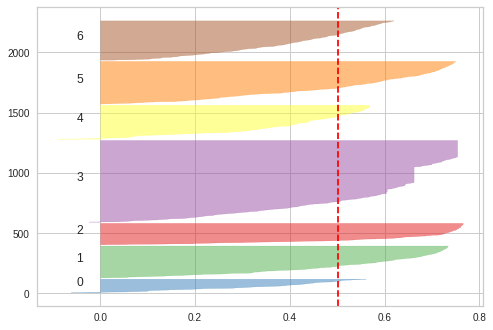

In [ ]:
# n_clusters=7
dat1_K7 = KMeans(n_clusters=7)
dat1_K7 = SilhouetteVisualizer(dat1_K7, colors='yellowbrick')
dat1_K7.fit(dat1clean)
cluster_dat1_K7 = dat1_K7.predict(dat1clean)
SilhouetteVisualizer(dat1_K7, dat1clean, colors='yellowbrick')
silhouetteScore7 = silhouette_score(dat1clean, cluster_dat1_K7, metric='euclidean')
print('Silhouetter Score:', silhouetteScore7)

#### **5. Results and Conclusion**

Now we reorganize the selected dataset with the cluster's information.

In [ ]:
# Copy dat1 clean
dat1_K7_cluster = dat1clean.copy(deep=True)
# Add UNITID, INSTNM, and Cluster
dat1_K7_cluster['cluster'] = cluster_dat1_K7
unitid = dat1['UNITID']
instnm = dat1['INSTNM']
dat1_K7_cluster.insert(0, 'UNITID', unitid)
dat1_K7_cluster.insert(1, 'INSTNM', instnm)

dat1_K7_cluster

,UNITID,INSTNM,ADM_RATE,SAT_AVG,TUITIONFEE_IN,TUITIONFEE_OUT,NPT41_PUB,PCTPELL,PCTFLOAN,UGDS_WHITE,C150_4,C150_L4,cluster
0,100654,Alabama A & M University,0.8989,823.0,7182.0,12774.0,12683.0,0.7115,0.8204,0.0279,0.29140,0.68215,4
1,100663,University of Alabama at Birmingham,0.8673,1146.0,7206.0,16398.0,12361.0,0.3505,0.5397,0.5987,0.53770,0.68215,6
3,100706,University of Alabama in Huntsville,0.8062,1180.0,9192.0,21506.0,14652.0,0.3281,0.4728,0.7012,0.48350,0.68215,6
4,100724,Alabama State University,0.5125,830.0,8720.0,15656.0,12342.0,0.8265,0.8735,0.0161,0.25170,0.68215,6
5,100751,The University of Alabama,0.5655,1171.0,9450.0,23950.0,17206.0,0.2107,0.4148,0.7865,0.66650,0.68215,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653,DeVry University-Virginia,0.7952,1038.0,16010.0,16010.0,9891.0,0.4802,0.5870,0.2363,0.22470,0.68215,3
7368,482662,DeVry University-Washington,0.7778,1038.0,16010.0,16010.0,9891.0,0.5855,0.7155,0.5494,0.29030,0.68215,3
7369,482671,DeVry University-Wisconsin,0.4545,1038.0,16010.0,16010.0,9891.0,0.6125,0.8500,0.5135,0.00000,0.68215,3
7370,482680,University of North Georgia,0.6102,1009.0,4219.0,12133.0,14418.0,0.3793,0.3858,0.7901,0.25970,0.68215,4


According to the theorem of K-Means Clustering, Cluster 0 has the lowest value of each variables overall, and Cluster 6 has the highest. However, factors selected have different polarities. For instance, when admission rate and completion rate are high, it means greater opportunity of entering and graduating. Meanwhile other factors like tuition fee, student loan and percentage of white are high, it means the unequitites and gaps are huge. Bascially means colleges either in Cluster 0 or 6 are not desired for underpriviledge population who are seeking for undergraduate degrees, since colleges in these two clusters are having extreme data, i.e high education qualities with high tuition fee and unbalaneced ethnicity.   
Therefore, underpriviledge population are more suitable for colleges that are in the middle cluster, which is Cluster 3. Colleges in Cluster 3 are balancing those selected factors, providing a moderate education quality with acceptable tuition fees, student loans and better distributed ethnicity.